In [221]:
import json
import urllib
import urllib.parse
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import nan
from scipy.stats import shapiro
from seaborn_qqplot import pplot
import wquantiles

In [292]:
def export_figure (title):
#    plt.tight_layout()
    plt.savefig(os.path.join("figs", title + ".png"))
    plt.show()

In [404]:
scopus_conferences = ["CEP", "ICER",  "ITiCSE", "Koli","UKICER"]

data_dir = "data"

In [405]:
def affil_institution(affil):
#    print ("affil_detail for ", affil)
    return affil['affilname']

def affil_is_uk(affil):
    if affil['affiliation-country'] == 'United Kingdom':
        return True

In [406]:
paper_dfs = []

paper_affiliation_dfs = []

for conference in scopus_conferences:
    with open(conference + "_papers.json") as conff:
        conf_paper_files=json.load(conff)
        for paper_fname in list(conf_paper_files):
            fname = urllib.parse.quote(paper_fname, safe='')
#            print ("opening ", fname)
            with open(os.path.join(data_dir, fname + ".json")) as paperf:
                paper = json.load(paperf)
                paper_dict = {}
                try:
                    date = paper['coredata']['prism:coverDate']
                    year = date[0:4]
                    month = date[5:7]
                    paper_dict['conference'] = conference
                    # ITiCSE happens in the summer
                    # the working group reports are published the following December or January
                    if(conference == "ITiCSE" and (month=="01")):
                        year = str(int(year) - 1)
                    # apart from in 2020 when the coverdate is listed as 17 June, not December
                    if(conference == "ITiCSE" and ((month in ["12","01"]) or (date=="2020-06-17"))):
                        paper_dict['conference'] = "ITiCSE_WG"
                        print("ITiCSE date " + date + " conference" + paper_dict['conference'] + " year " + year)
                    


                    paper_dict['year'] = [year]
                    paper_dict['month'] = [month]

                    paper_dict['title'] = [paper['coredata']['dc:title'].strip()]
                    paper_dict['doi'] = [paper['coredata']['prism:doi']]
                    paper_dict['pub_date'] = [paper['coredata']['prism:coverDate']]
                    paper_dict['scopus_url'] = [paper['coredata']['prism:url']]

                    title_hash = str(hash(str(paper_dict['title'][0])))
                    paper_dict['title_hash'] = [title_hash]
                    paper_dict['key'] = "_".join([conference,year , title_hash[-6:]])
                    paper_affils = paper['affiliation']
                    try:
                        end_page = paper['coredata']['prism:endingPage']
                        start_page = paper['coredata']['prism:startingPage']
                        num_pages = int(end_page) - int(start_page) + 1
                    except Exception:
                        num_pages = nan
                    paper_dict['num_pages'] = num_pages
                    
                    if not (isinstance(paper_affils, list)):
                        paper_affils = [paper_affils]
                    
                    paper_uk_affils = filter(affil_is_uk, paper_affils)
                    
                    paper_uk_institutions = list(map(affil_institution, paper_uk_affils))

                    paper_affiliation_df = pd.DataFrame({"institution": paper_uk_institutions})
                    paper_affiliation_df['paper'] = paper_dict['key']
                    paper_affiliation_df['weight'] = 1 / len(paper_affils)
                    paper_affiliation_df['conference'] = paper_dict['conference']
                    paper_affiliation_df['doi'] = paper_dict['doi'][0]

                    try:
                        paper_dict['abstract'] = [paper['coredata']['dc:description']]
                    except Exception:
                        paper_dict['abstract'] = ''

                except KeyError as e:
                    print("KeyError ", e, " in ",fname)
                paper_df = pd.DataFrame(paper_dict)
                paper_dfs.append(paper_df)
                paper_affiliation_dfs.append(paper_affiliation_df)

#print(paper)

KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85216107850
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85216101881
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85198629881
ITiCSE date 2023-12-22 conferenceITiCSE_WG year 2023
ITiCSE date 2023-12-22 conferenceITiCSE_WG year 2023
ITiCSE date 2023-12-22 conferenceITiCSE_WG year 2023
ITiCSE date 2023-12-22 conferenceITiCSE_WG year 2

In [407]:
with open("2018_CEP_papers.json") as CEP_2018f:
    CEP_2018_papers=json.load(CEP_2018f)

def CEP_2018_paper_institutions(authors):
    institution = None
    for author in authors:
        skip
        
        
for paper in CEP_2018_papers:
    conference = "CEP"
    year = "2018"
    paper_dict = {}
    
    paper_dict['conference'] = conference
    paper_dict['year'] = [year]
    paper_dict['title'] = [paper['title'].strip()]
    print ("adding ", paper_dict['title'])
    paper_dict['abstract'] = [paper['abstract']]
    
    title_hash = str(hash(str(paper_dict['title'][0])))
    paper_dict['title_hash'] = [title_hash]
    paper_dict['key'] = "_".join([conference,year , title_hash[-6:]])

    paper_affils = paper['authors']
    if not (isinstance(paper_affils, list)):
        paper_affils = [paper_affils]
    
    
    
    paper_df = pd.DataFrame(paper_dict)
    paper_dfs.append(paper_df)

    
CEP_2018_papers[3]['authors']

adding  ['Sustainable Computing: a home for LSEP, Commercial practice and Research skills']
adding  ['Including IT service management in the Computing curriculum: a caricature approach.']
adding  ['Intelligent Agents for Education']
adding  ['"It\'s only a computing project - so there can\'t be any ethical issues..."']
adding  ['No money worries: new student identities for Graduate Level Apprentices']
adding  ['The enemies within - inhibitors to learning']
adding  ['Blocks-based programming for introductory programming in Python']
adding  ['Enhancing computer programming skills through Virtual Reality']
adding  ['Supporting the learning of programming with the PRIMM approach']
adding  ['Self regulated Learning in Engineering and Computing Classrooms']
adding  ['Learner engagement in larger computer science classes']
adding  ["Promoting learning by going against students' preference to learning"]
adding  ['The Associate Student Project celebrates five years of student transitions from f

[{'firstName': 'David',
  'lastName': 'Bowers',
  'email': '',
  'department': '',
  'institution': 'The Open University'}]

In [408]:
papers_df = pd.concat(paper_dfs)
papers_df.set_index('key', inplace=True)
# remove WG pre-reports
papers_df = papers_df[(papers_df.num_pages > 2) | (papers_df.conference != "ITiCSE")]

In [409]:
for conf in papers_df.conference.unique():
    print ("pubDate for ", conf, papers_df[papers_df.conference == conf]['pub_date'].unique() )

pubDate for  CEP ['2025-01-07' '2024-01-05' '2023-01-06' '2022-01-06' '2021-01-07'
 '2020-01-09' '2019-01-09' nan]
pubDate for  ICER ['2024-08-13' nan '2023-08-07' '2022-08-03' '2021-08-16' '2020-08-10'
 '2019-07-30']
pubDate for  ITiCSE_WG ['2025-01-23' '2023-12-22' '2022-12-27' '2021-12-28' '2020-06-17'
 '2019-12-18']
pubDate for  ITiCSE ['2024-07-03' '2023-06-29' '2022-07-07' '2021-06-26' '2020-06-15'
 '2019-07-02']
pubDate for  Koli ['2024-11-13' '2023-11-13' '2022-11-17' '2021-11-17' '2020-11-19'
 '2019-11-21']
pubDate for  UKICER ['2024-11-06' nan '2023-09-07' '2022-09-01' '2021-09-02' '2020-09-03'
 '2019-09-05']


In [410]:
papers_df[papers_df['num_pages'].isnull()].groupby('conference').count()

,year,month,title,doi,pub_date,scopus_url,title_hash,num_pages,abstract
conference,,,,,,,,,
CEP,56,36,56,36,36,36,56,0,56
ICER,4,4,4,2,2,2,2,0,2
Koli,27,27,27,27,27,27,27,0,27
UKICER,80,80,80,76,76,76,76,0,76


In [411]:
papers_df.groupby('conference').count()

,year,month,title,doi,pub_date,scopus_url,title_hash,num_pages,abstract
conference,,,,,,,,,
CEP,103,83,103,83,83,83,103,47,103
ICER,28,28,28,26,26,26,26,24,26
ITiCSE,34,34,34,34,34,34,34,34,34
ITiCSE_WG,31,31,31,31,31,31,31,31,31
Koli,27,27,27,27,27,27,27,0,27
UKICER,87,87,87,83,83,83,83,7,83


In [412]:
affiliations_df = pd.concat(paper_affiliation_dfs)
# remove all papers excluded
#included_paper_ids = papers_df['key']

affiliations_df = affiliations_df[affiliations_df.paper.isin(papers_df.index)]
affiliations_df

,institution,paper,weight,conference,doi
0,University of Glasgow,CEP_2025_592883,1.000000,CEP,10.1145/3702212.3702220
0,The Open University,CEP_2025_301862,0.500000,CEP,10.1145/3702212.3702223
1,Swansea University,CEP_2025_301862,0.500000,CEP,10.1145/3702212.3702223
0,University of Strathclyde,CEP_2025_958786,0.500000,CEP,10.1145/3702212.3702217
1,University of Glasgow,CEP_2025_958786,0.500000,CEP,10.1145/3702212.3702217
...,...,...,...,...,...
0,University of Kent,UKICER_2019_738070,0.500000,UKICER,10.1145/3351287.3351297
0,Edinburgh Napier University,UKICER_2019_754863,1.000000,UKICER,10.1145/3351287.3351294
0,University of Glasgow,UKICER_2019_761416,1.000000,UKICER,10.1145/3351287.3351293
0,Queen Mary University of London,UKICER_2019_240686,0.333333,UKICER,10.1145/3351287.3351291


In [413]:
affiliations_df[affiliations_df.conference=="ITiCSE"].sort_values('weight')

,institution,paper,weight,conference,doi
1,Glasgow Caledonian University,ITiCSE_2020_142605,0.090909,ITiCSE,10.1145/3341525.3394992
0,University of Lincoln,ITiCSE_2020_142605,0.090909,ITiCSE,10.1145/3341525.3394992
1,Raspberry Pi Foundation,ITiCSE_2020_037684,0.111111,ITiCSE,10.1145/3341525.3387418
0,University of Glasgow,ITiCSE_2020_037684,0.111111,ITiCSE,10.1145/3341525.3387418
0,The Open University,ITiCSE_2020_328953,0.142857,ITiCSE,10.1145/3341525.3387423
0,Aberystwyth University,ITiCSE_2019_893357,0.166667,ITiCSE,10.1145/3304221.3319783
0,University of Bath,ITiCSE_2024_450694,0.200000,ITiCSE,10.1145/3649217.3653578
1,The Open University,ITiCSE_2024_450694,0.200000,ITiCSE,10.1145/3649217.3653578
2,University of Northumbria,ITiCSE_2024_450694,0.200000,ITiCSE,10.1145/3649217.3653578
3,Swansea University,ITiCSE_2024_450694,0.200000,ITiCSE,10.1145/3649217.3653578


In [414]:
institutions_df = pd.read_excel("institutions.xlsx", dtype=str)
#institutions_df

In [415]:
affiliations_domain = pd.merge(affiliations_df, institutions_df, how="left", left_on='institution', right_on='name')

def fix_affiliation (row):
    if not (isinstance(row['domain'], float)):
        return row['domain']
    for index, inst_row in institutions_df.iterrows():
        if inst_row['name'] in row['institution']:
            return inst_row['domain']
    if row['doi'] == "10.1145/3631802.3631803":
        return "cam"
    if row['doi'] == "10.1145/3649217.3653622":
        return "warwick"
    if row['doi'] == "10.1145/3587103.3594143":
        return "citystgeorges"
    if row['doi'] == "10.1145/3304221.3325580":
        return "warwick"
    if row['doi'] == "10.1145/3501385.3543960":
        return "cam"
    
affiliations_domain['domain'] = affiliations_domain.apply(fix_affiliation, axis=1)

affiliations_domain[affiliations_domain.domain.isnull()]

,institution,paper,weight,conference,doi,domain,name
331,IBM United Kingdom Limited,UKICER_2023_287166,0.166667,UKICER,10.1145/3610969.3611121,None,NaN
335,ForgeRock,UKICER_2023_287166,0.166667,UKICER,10.1145/3610969.3611121,None,NaN
400,Barefoot Computing,UKICER_2019_240686,0.333333,UKICER,10.1145/3351287.3351291,None,NaN


Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)


/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


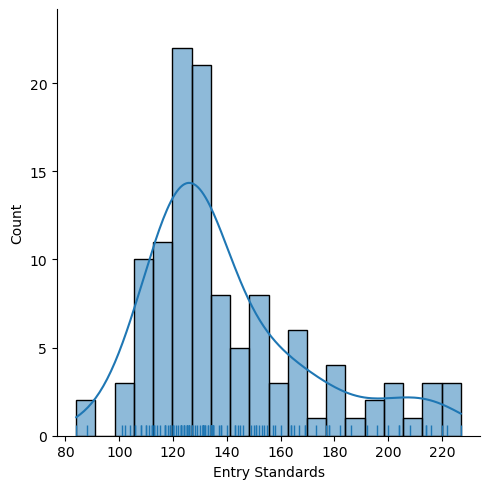

In [416]:
# Is Entry Standards data normally distributed? (Shapiro-Wilk)

stat, p = shapiro(cug_df['Entry Standards'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

cug_df = pd.read_csv("Complete_University_Guide_Computer_Science_2025.csv", skiprows=4)

cug_domain = pd.merge(cug_df, institutions_df, how="left", left_on='Institution', right_on='name')
len(cug_domain[cug_domain.domain.notnull()])

def fix_institution(row, colname):
    if not (isinstance(row['domain'], float)):
        return row['domain']
    for index, inst_row in institutions_df.iterrows():
        if inst_row['name'] in row[colname]:
            return inst_row['domain']
    
def fix_cug_institution (row):
    return fix_institution(row, 'Institution')

    
cug_domain['domain'] = cug_domain.apply(fix_cug_institution, axis=1)

cug_domain[cug_domain.domain.isnull()]

sns.displot(data=cug_df, x="Entry Standards", kde=True, rug=True, bins = 20)


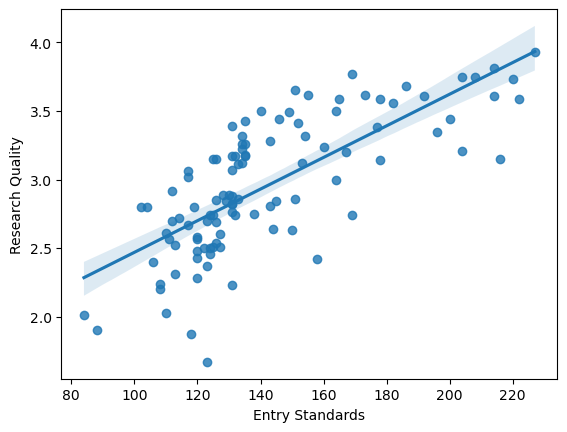

In [417]:
sns.regplot(data=cug_df, x="Entry Standards", y="Research Quality")
export_figure('entry_standards_research_quality')

In [418]:
affiliations_cug = affiliations_domain.merge(cug_domain[pd.notnull(cug_domain.domain)], how="left", on="domain")
affiliations_cug
affiliations_cug[affiliations_cug['Entry Standards'].isnull()]['institution'].unique()

array(['The Open University', 'Arunside Primary School',
       'Altitude Foundation', 'Raspberry Pi Foundation',
       'London School of Economics and Political Science',
       'The Alan Turing Institute', 'Birmingham Newman University',
       'The Scottish Tech Army', "St Mark's West Essex Catholic School",
       'IBM United Kingdom Limited', 'ForgeRock', 'Theatr Na NOg',
       'Barefoot Computing'], dtype=object)

In [458]:
student_numbers = pd.read_csv("HESA-table-37.csv", skiprows=20)

student_numbers['Number'] = pd.to_numeric(student_numbers.Number)

# print(student_numbers['Category'].unique())
# print(student_numbers['Academic Year'].unique())

student_numbers = student_numbers[(student_numbers['Category'] == '121 IT, systems sciences & computer software engineering') &
                                  (student_numbers['Academic Year'] == '2023/24') &
                                  (student_numbers['UKPRN'].notnull()) &
                                  (student_numbers['Country of HE provider'] == 'All') &
                                  (student_numbers['Number']>0)
                                 ]
student_numbers['HE provider'] = student_numbers['HE provider'].str.replace("The University","University")

student_numbers_domain = pd.merge(student_numbers, institutions_df, how="left", left_on='HE provider', right_on='name')


def fix_numbers_institution (row):
    return fix_institution(row, 'HE provider')

    
student_numbers_domain['domain'] = student_numbers_domain.apply(fix_numbers_institution, axis=1)

student_numbers_domain = student_numbers_domain[['HE provider', 'Academic Year', 'Number', 'domain']]
print(len(student_numbers_domain[student_numbers_domain.domain.notnull()]))

student_numbers_domain[student_numbers_domain.domain.isnull()].sort_values('Number')

#student_numbers.sort_values('Number')

121


,HE provider,Academic Year,Number,domain
72,LIBF Limited,2023/24,5,None
34,Coleg Gwent,2023/24,5,None
77,Grŵp Llandrillo Menai,2023/24,5,None
21,University College of Osteopathy,2023/24,10,None
28,Cardiff and Vale College,2023/24,10,None
126,University Centre Peterborough,2023/24,15,None
60,Institute of Contemporary Music Performance,2023/24,15,None
89,Grŵp NPTC Group,2023/24,20,None
59,ICON College of Technology and Management,2023/24,40,None
129,University of Law,2023/24,45,None


In [455]:
#cug_domain_numbers = cug_domain.merge(student_numbers_domain[pd.notnull(student_numbers_domain.domain)], how="left", on="domain")
cug_domain_numbers = cug_domain.merge(student_numbers_domain, how="left", on="domain")

cug_domain_numbers[cug_domain_numbers.Number.isnull()]

,Rank,Institution,Entry Standards,Student Satisfaction,Research Quality,Continuation,Graduate prospects outcomes,Graduate prospects on track,Overall Score,domain,name,HE provider,Academic Year,Number
2,3,Imperial College London,227,3.16,3.93,93.8,97.0,90.0,96.6,imperial,Imperial College London,NaN,NaN,NaN
6,7,UCL (University College London),208,2.88,3.75,95.1,93.0,80.0,92.3,ucl,NaN,NaN,NaN,NaN
95,95,University of Buckingham,113,3.07,NaN,90.5,78.0,88.0,74.5,buckingham,University of Buckingham,NaN,NaN,NaN


<Axes: xlabel='Entry Standards', ylabel='Count'>

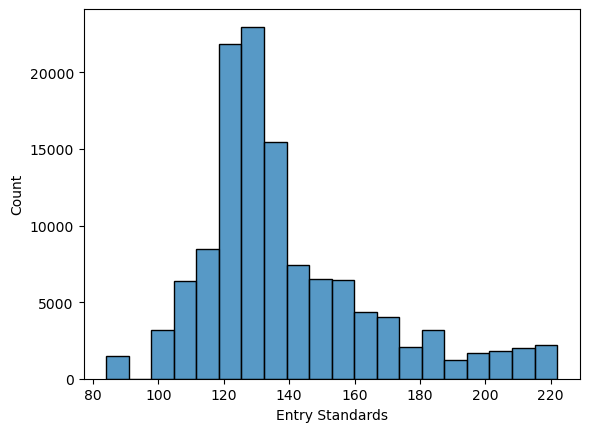

In [456]:
# weighted
sns.histplot(data=cug_domain_numbers, x="Entry Standards", bins = 20, weights=cug_domain_numbers.Number)

<Axes: xlabel='Entry Standards', ylabel='Proportion'>

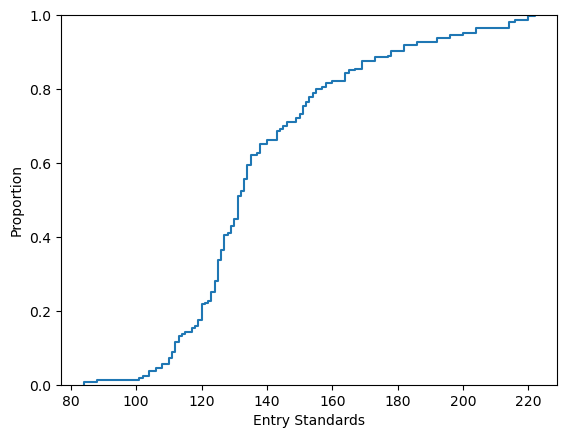

In [422]:
sns.ecdfplot(data=cug_domain_numbers, x="Entry Standards", weights=cug_domain_numbers.Number)

In [423]:
affiliations_cug_numbers = affiliations_cug.merge(student_numbers_domain[pd.notnull(student_numbers_domain.domain)], how="left", on="domain")
affiliations_cug_numbers[affiliations_cug_numbers.Number.isnull()]['institution'].unique()

array(['Arunside Primary School', 'Altitude Foundation',
       'Raspberry Pi Foundation',
       'London School of Economics and Political Science',
       'The Alan Turing Institute', 'The Scottish Tech Army',
       "St Mark's West Essex Catholic School",
       'IBM United Kingdom Limited', 'ForgeRock', 'Theatr Na NOg',
       'Barefoot Computing'], dtype=object)

In [475]:
affiliations_cug
ecdf_affil_df = affiliations_cug[['conference','domain', 'weight', 'Entry Standards']]
ecdf_affil_df.columns=['source','domain','weight','Entry Standards']

ecdf_cug_df = cug_domain_numbers.copy()[['domain','Number', 'Entry Standards']]
ecdf_cug_df['source']='CUG (weighted)'
ecdf_cug_df.columns=['domain','weight','Entry Standards','source']

ecdf_cug_unweighted_df = cug_domain_numbers.copy()[['domain', 'Entry Standards']]
ecdf_cug_unweighted_df['weight']=1
ecdf_cug_unweighted_df['source']='CUG (unweighted)'
ecdf_cug_unweighted_df.columns=['domain','Entry Standards','weight','source']



ecdf_df = pd.concat([ecdf_affil_df, ecdf_cug_df, ecdf_cug_unweighted_df]).reset_index()
ecdf_df

,index,source,domain,weight,Entry Standards
0,0,CEP,gla,1.0,214.0
1,1,CEP,open,0.5,NaN
2,2,CEP,swansea,0.5,134.0
3,3,CEP,strath,0.5,204.0
4,4,CEP,gla,0.5,214.0
...,...,...,...,...,...
635,114,CUG (unweighted),wlv,1.0,84.0
636,115,CUG (unweighted),londonmet,1.0,88.0
637,116,CUG (unweighted),uos,1.0,121.0
638,117,CUG (unweighted),uca,1.0,138.0


/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


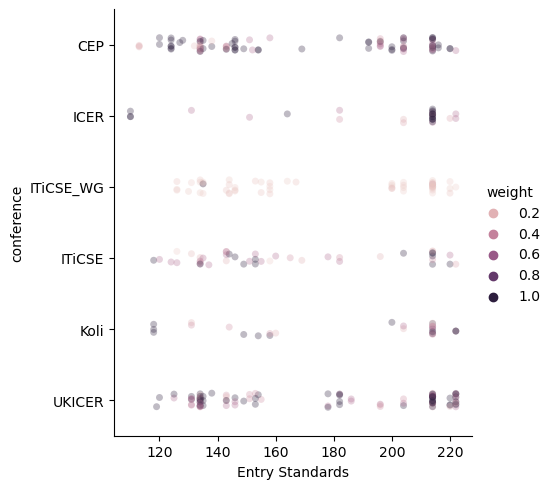

In [424]:
sns.catplot(data=affiliations_cug,x="Entry Standards", y="conference", hue="weight", alpha=0.3)
export_figure('affiliation_entry_standards')

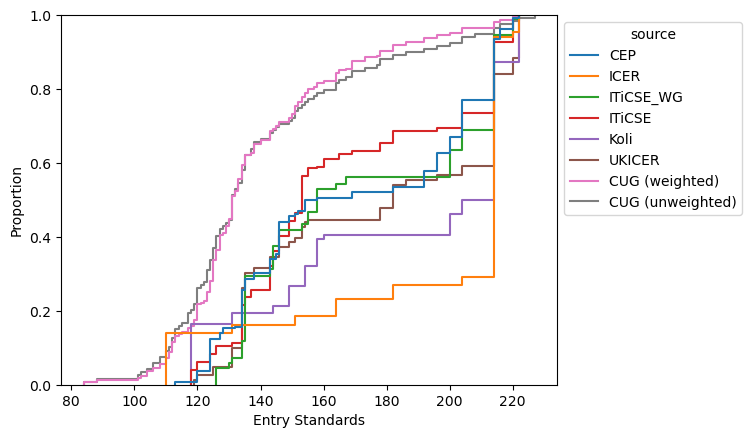

In [481]:
# make a new df combining affiliations and cug institutions so we can plot on one graph


ax = sns.ecdfplot(data=ecdf_df, x="Entry Standards", weights=ecdf_df.weight, hue="source")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#sns.ecdfplot(data=cug_domain_numbers, x="Entry Standards", weights=cug_domain_numbers.Number, ax=ax)


<Axes: xlabel='Graduate prospects outcomes', ylabel='Proportion'>

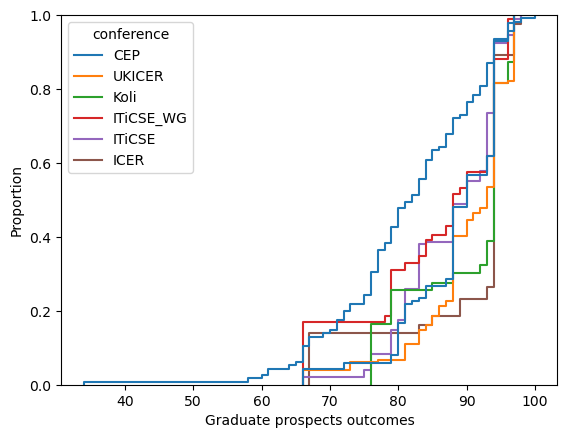

In [402]:
fig, ax = plt.subplots()

sns.ecdfplot(data=affiliations_cug, x="Graduate prospects outcomes", weights=affiliations_cug.weight, hue="conference", ax=ax)


#sns.ecdfplot(data=cug_domain_numbers, x="Entry Standards", weights=cug_domain_numbers.Number, ax=ax)

sns.ecdfplot(data=cug_domain_numbers, x="Graduate prospects outcomes", ax=ax)

In [393]:
affiliations_cug[(affiliations_cug.conference == "ICER") & (affiliations_cug["Entry Standards"].notnull())].sort_values("Entry Standards")

,institution,paper,weight,conference,doi,domain,name_x,Rank,Institution,Entry Standards,Student Satisfaction,Research Quality,Continuation,Graduate prospects outcomes,Graduate prospects on track,Overall Score,name_y
371,Middlesex University,ICER_2024_359492,1.000000,ICER,10.1145/3632621.3671417,mdx,Middlesex University,106.0,Middlesex University,110.0,3.30,2.61,79.9,67.0,52.0,71.2,Middlesex University
372,Middlesex University,ICER_2024_359492,1.000000,ICER,10.1145/3632621.3671417,mdx,Middlesex University,106.0,Middlesex University,110.0,3.30,2.61,79.9,67.0,52.0,71.2,Middlesex University
373,Middlesex University,ICER_2024_359492,1.000000,ICER,10.1145/3632621.3671417,mdx,Middlesex University,106.0,Middlesex University,110.0,3.30,2.61,79.9,67.0,52.0,71.2,Middlesex University
401,University of Kent,ICER_2019_507687,0.500000,ICER,10.1145/3291279.3339403,kent,University of Kent,40.0,University of Kent,131.0,2.93,3.39,94.3,85.0,77.0,83.4,University of Kent
388,Queen Mary University of London,ICER_2021_800251,0.500000,ICER,10.1145/3446871.3469751,qmul,Queen Mary University of London,27.0,Queen Mary University of London,151.0,3.02,3.65,95.1,83.0,82.0,86.6,Queen Mary University of London
399,"University of Nottingham, Faculty of Social Sc...",ICER_2019_801459,1.000000,ICER,10.1145/3291279.3339425,nottingham,NaN,24.0,University of Nottingham,164.0,3.02,3.50,92.6,89.0,86.0,87.7,University of Nottingham
376,King's College London,ICER_2023_240451,0.500000,ICER,10.1145/3568813.3600133,kcl,King's College London,10.0,"King's College London, University of London",182.0,2.95,3.56,96.2,97.0,89.0,91.6,NaN
385,King's College London,ICER_2022_768289,0.333333,ICER,10.1145/3501385.3543971,kcl,King's College London,10.0,"King's College London, University of London",182.0,2.95,3.56,96.2,97.0,89.0,91.6,NaN
394,University of Warwick,ICER_2020_124737,0.200000,ICER,10.1145/3372782.3406279,warwick,University of Warwick,5.0,University of Warwick,204.0,3.01,3.75,96.0,93.0,86.0,93.4,University of Warwick
396,University of Warwick,ICER_2019_835060,0.250000,ICER,10.1145/3291279.3339409,warwick,University of Warwick,5.0,University of Warwick,204.0,3.01,3.75,96.0,93.0,86.0,93.4,University of Warwick


In [400]:
# weighted mean
for characteristic in ['Entry Standards', 'Graduate prospects outcomes', 'Research Quality']:
    print ("CUG", characteristic, "mean", cug_domain_numbers[characteristic].mean())
    print ("CUG", characteristic, "weighted mean", (cug_domain_numbers[characteristic]*cug_domain_numbers['Number']).sum() / cug_domain_numbers['Number'].sum())
#    print ("CUG", characteristic, "median", cug_df[characteristic].median())

    for conference in scopus_conferences + ["ITiCSE_WG"]:
        conf_affils_cug = affiliations_cug[affiliations_cug.conference == conference]

        affil_weighted_mean =  (conf_affils_cug[characteristic] * conf_affils_cug['weight']).sum() / conf_affils_cug['weight'].sum()
        print(conference, characteristic, "weighted mean", affil_weighted_mean)
#        affil_weighted_median = wquantiles.median(conf_affils_cug[characteristic], conf_affils_cug['weight'])
#        print(conference, characteristic, "weighted median", affil_weighted_median)


CUG Entry Standards mean 140.16806722689077
CUG Entry Standards weighted mean 139.19113867243277
CEP Entry Standards weighted mean 154.76441102756894
UKICER Entry Standards weighted mean 157.73914782956592
Koli Entry Standards weighted mean 169.35556811758056
ITiCSE Entry Standards weighted mean 154.00405874791454
ICER Entry Standards weighted mean 180.23733719247468
ITiCSE_WG Entry Standards weighted mean 155.2065725576473
CUG Graduate prospects outcomes mean 81.23478260869565
CUG Graduate prospects outcomes weighted mean 80.38823385418792
CEP Graduate prospects outcomes weighted mean 80.05742481203008
UKICER Graduate prospects outcomes weighted mean 79.0736147229446
Koli Graduate prospects outcomes weighted mean 83.12379875635953
ITiCSE Graduate prospects outcomes weighted mean 81.10035008068266
ICER Graduate prospects outcomes weighted mean 84.0057887120116
ITiCSE_WG Graduate prospects outcomes weighted mean 75.50828405457524
CUG Research Quality mean 2.959150943396226
CUG Research 

In [248]:
affiliations_grouped = affiliations_cug.groupby(["conference", "domain"])["weight"].sum().reset_index()

In [249]:
affiliations_grouped[affiliations_grouped['conference']=="ITiCSE"].sort_values("weight")

,conference,domain,weight
53,ITiCSE,gcu,0.090909
61,ITiCSE,lincoln,0.090909
45,ITiCSE,aber,0.166667
46,ITiCSE,abertay,0.200000
48,ITiCSE,bath,0.200000
49,ITiCSE,cam,0.250000
66,ITiCSE,ox,0.250000
69,ITiCSE,sheffield,0.333333
65,ITiCSE,open,0.342857
70,ITiCSE,shu,0.500000


In [393]:
papers_df.to_csv("papers.csv")